In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/content/Steel_data.csv')
data.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,42,50,270900,270944,267,17,44,24220,76,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,2,645,651,2538079,2538108,108,10,30,11397,84,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,3,829,835,1553913,1553931,71,8,19,7972,99,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,4,853,860,369370,369415,176,13,45,18996,99,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,5,1289,1306,498078,498335,2409,60,260,246930,37,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [ ]:
selected_columns=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']
Y=data[selected_columns].values
len(Y)

1941

In [ ]:
X=data.drop(selected_columns,axis=1).values
len(X)

1941

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test,Y_test)

0.9588688946015425

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred=model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       1.00      0.81      0.89        42
           2       0.97      0.99      0.98        77
           3       1.00      0.93      0.96        14
           4       1.00      0.78      0.88         9
           5       0.99      0.99      0.99        78
           6       1.00      0.99      1.00       134

   micro avg       0.99      0.96      0.98       389
   macro avg       0.99      0.92      0.95       389
weighted avg       0.99      0.96      0.97       389
 samples avg       0.96      0.96      0.96       389



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(Y_test)
print(y_pred)

[[0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
[[0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
Y1=np.argmax(Y_test,axis=1)
Y2=np.argmax(y_pred,axis=1)

[[ 35   0   0   0   0   0   0]
 [  6  34   2   0   0   0   0]
 [  1   0  76   0   0   0   0]
 [  1   0   0  13   0   0   0]
 [  1   0   0   0   7   1   0]
 [  1   0   0   0   0  77   0]
 [  1   0   0   0   0   0 133]]


<Axes: >

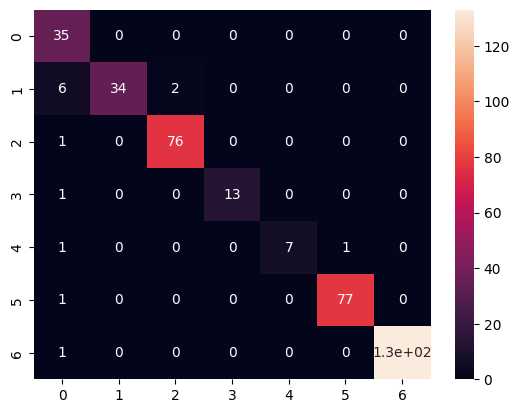

In [ ]:
cm=confusion_matrix(Y1,Y2)
print(cm)
import matplotlib.pyplot as plt
import seaborn as sb
sb.heatmap(cm,annot=True)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test,Y_test)

0.8303341902313625

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc.score(X_test,Y_test)

0.9974293059125964

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [ ]:
gnb.fit(X_test,Y1)
gnb.score(X_test,Y2)

0.8431876606683805

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv1=cross_val_score(model,X,np.argmax(Y,axis=1),cv=15)
cv2=cross_val_score(knn,X,np.argmax(Y,axis=1),cv=15)
cv3=cross_val_score(dtc,X,np.argmax(Y,axis=1),cv=15)

In [ ]:
print("Random Forest score",cv1)
print("KNN score",cv2)
print("Decision Tree score",cv3)

Random Forest score [0.79230769 0.93846154 0.99230769 1.         1.         0.99230769
 0.99224806 0.99224806 0.99224806 1.         0.98449612 1.
 1.         0.96124031 0.72868217]
KNN score [0.24615385 0.37692308 0.33846154 0.4        0.43076923 0.47692308
 0.39534884 0.27131783 0.34883721 0.34883721 0.37984496 0.41860465
 0.39534884 0.44186047 0.40310078]
Decision Tree score [0.52307692 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.68992248]


In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sentence_transformers import SentenceTransformer, util
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import getpass

HF_API_TOKEN = getpass.getpass("Enter your Hugging Face API Token: ")

data_path = "/content/Steel_data.csv"
data = pd.read_csv(data_path)

selected_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
Y = data[selected_columns].values
X = data.drop(selected_columns, axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, Y_pred, zero_division=0))

retrieval_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

defect_prevention_measures = {
    "Z_Scratch": "Improve material handling and use protective coatings to prevent scratches.",
    "Dirtiness": "Enhance cleaning processes and implement better quality control before packaging.",
    "K_Scatch": "Use precision cutting tools to reduce sharp edges that cause scratches.",
    "Stains": "Optimize cooling processes and prevent oxidation by using protective oil films.",
    "Bumps": "Adjust rolling mill parameters and inspect rollers for surface irregularities.",
    "Other_Faults": "Implement automated defect detection systems and real-time monitoring.",
}


prevention_texts = list(defect_prevention_measures.values())
prevention_embeddings = retrieval_model.encode(prevention_texts, convert_to_tensor=True)

model_name = "microsoft/Phi-3.5-mini-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=HF_API_TOKEN)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, use_auth_token=HF_API_TOKEN)


generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

def generate_recommendation(defect_types):
    defect_text = ", ".join(defect_types)
    defect_embedding = retrieval_model.encode(defect_text, convert_to_tensor=True)


    similarities = util.pytorch_cos_sim(defect_embedding, prevention_embeddings)
    top_indices = similarities.argsort(descending=True).tolist()[0][:2]

    retrieved_texts = [prevention_texts[idx] for idx in top_indices]
    combined_text = " ".join(retrieved_texts)


    prompt = f"Suggest AI-based defect prevention measures for steel manufacturing. Defects: {defect_text}. Recommended strategies: {combined_text}"

    response = generator(prompt, max_length=250, num_return_sequences=1, temperature=0.7)

    return response[0]["generated_text"]


sample_defects = ["Z_Scratch", "K_Scratch"]
recommendation = generate_recommendation(sample_defects)

print("\nAI-based Recommendation for Defect Prevention:")
print(recommendation)


Enter your Hugging Face API Token: ··········
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       1.00      0.93      0.96        41
           2       1.00      0.98      0.99        83
           3       1.00      0.92      0.96        13
           4       1.00      0.75      0.86         8
           5       1.00      0.99      0.99        72
           6       1.00      1.00      1.00       143

   micro avg       1.00      0.97      0.99       389
   macro avg       1.00      0.93      0.96       389
weighted avg       1.00      0.97      0.99       389
 samples avg       0.97      0.97      0.97       389



/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:897: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/3.45k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/195 [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(



AI-based Recommendation for Defect Prevention:
Suggest AI-based defect prevention measures for steel manufacturing. Defects: Z_Scratch, K_Scratch. Recommended strategies: Improve material handling and use protective coatings to prevent scratches. Use precision cutting tools to reduce sharp edges that cause scratches. Implement AI-based inspection systems to detect and classify scratches. Use machine learning algorithms to analyze historical defect data and predict potential defect locations. Implement real-time monitoring systems to detect and alert operators about scratches during the manufacturing process. Use AI-based image recognition technology to automatically identify and classify scratches on steel surfaces. Implement predictive maintenance strategies to prevent equipment-related scratches. Use AI-based anomaly detection algorithms to identify abnormal patterns in the manufacturing process that may lead to scratches. Implement AI-based quality control systems to continuously m

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE

# Feature Importance Plot
feature_importance = clf.feature_importances_
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_names, orient='h')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Defect Classification")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=selected_columns, yticklabels=selected_columns)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Defect Occurrence Distribution
defect_counts = data[selected_columns].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x=defect_counts.index, y=defect_counts.values, palette="viridis")
plt.xlabel("Defect Type")
plt.ylabel("Count")
plt.title("Distribution of Defect Occurrences in Dataset")
plt.xticks(rotation=45)
plt.show()

# t-SNE Visualization of Feature Embeddings
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_test)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=Y_test.argmax(axis=1), cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Defect Type")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Feature Embeddings")
plt.show()


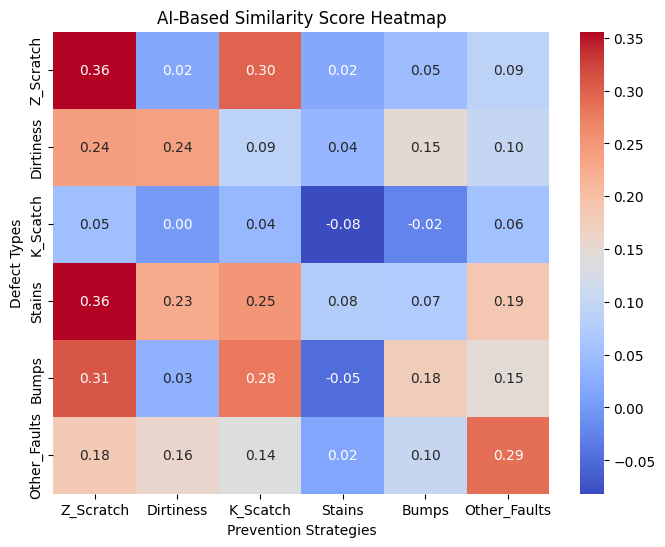

In [ ]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

# Initialize the sentence transformer model
retrieval_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Defect Prevention Measures
defect_prevention_measures = {
    "Z_Scratch": "Improve material handling and use protective coatings to prevent scratches.",
    "Dirtiness": "Enhance cleaning processes and implement better quality control before packaging.",
    "K_Scatch": "Use precision cutting tools to reduce sharp edges that cause scratches.",
    "Stains": "Optimize cooling processes and prevent oxidation by using protective oil films.",
    "Bumps": "Adjust rolling mill parameters and inspect rollers for surface irregularities.",
    "Other_Faults": "Implement automated defect detection systems and real-time monitoring.",
}

# Generate embeddings
defect_types = list(defect_prevention_measures.keys())
prevention_texts = list(defect_prevention_measures.values())

defect_embeddings = retrieval_model.encode(defect_types, convert_to_tensor=True)
prevention_embeddings = retrieval_model.encode(prevention_texts, convert_to_tensor=True)

# Compute cosine similarity matrix
similarity_matrix = util.pytorch_cos_sim(defect_embeddings, prevention_embeddings).cpu().numpy()

# Plot similarity heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, xticklabels=defect_types, yticklabels=defect_types, cmap="coolwarm", fmt=".2f")
plt.xlabel("Prevention Strategies")
plt.ylabel("Defect Types")
plt.title("AI-Based Similarity Score Heatmap")
plt.show()


In [ ]:
import pandas as pd

# Save test labels and predictions
pd.DataFrame(Y_test).to_csv("Y_test.csv", index=False)
pd.DataFrame(y_pred).to_csv("y_pred.csv", index=False)

print("Saved Y_test.csv and y_pred.csv. Upload these files here.")


Saved Y_test.csv and y_pred.csv. Upload these files here.


In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import simpleSplit
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Load test labels and predictions from CSV
Y_test = pd.read_csv("Y_test.csv").values
y_pred = pd.read_csv("y_pred.csv").values

# Convert one-hot encoded labels to class indices if necessary
Y1 = np.argmax(Y_test, axis=1)
Y2 = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
class_report = classification_report(Y1, Y2, target_names=[
    "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"
])
cm = confusion_matrix(Y1, Y2)

# AI Recommendation based on performance
accuracy = np.trace(cm) / np.sum(cm)  # Calculate accuracy from confusion matrix
if accuracy > 0.90:
    recommendation = (
        "The model performs excellently. It can be used in production. "
        "Continue monitoring to ensure stable performance over time."
    )
elif accuracy > 0.75:
    recommendation = (
        "The model performs well but may benefit from hyperparameter tuning. "
        "Consider fine-tuning feature selection or trying different algorithms."
    )
else:
    recommendation = (
        "The model needs improvement. Consider feature engineering, "
        "data augmentation, or alternative machine learning models."
    )

# Create the PDF report
report_path = "Defect_Detection_Report.pdf"
c = canvas.Canvas(report_path, pagesize=letter)
c.setFont("Helvetica-Bold", 14)

# Title
c.drawString(100, 750, "Defect Detection AI Report")
c.setFont("Helvetica", 12)
c.drawString(100, 735, "----------------------------------------------")

# Classification Report
c.drawString(100, 710, "Classification Report:")
y_offset = 690

# Properly format classification report for PDF
class_report_lines = class_report.split("\n")
for line in class_report_lines:
    wrapped_lines = simpleSplit(line, "Helvetica", 12, 400)  # Wrapping text properly
    for wrapped_line in wrapped_lines:
        c.drawString(100, y_offset, wrapped_line)
        y_offset -= 15

# Confusion Matrix
c.drawString(100, y_offset - 20, "Confusion Matrix:")
y_offset -= 40
for row in cm:
    c.drawString(100, y_offset, "  ".join(f"{num:4d}" for num in row))  # Properly spacing matrix values
    y_offset -= 15

# AI Recommendation
c.drawString(100, y_offset - 30, "AI Recommendation:")
y_offset -= 50
wrapped_recommendation = simpleSplit(recommendation, "Helvetica", 12, 400)
for line in wrapped_recommendation:
    c.drawString(100, y_offset, line)
    y_offset -= 15

# Save PDF
c.save()

print(f"PDF report generated: {report_path}")


PDF report generated: Defect_Detection_Report.pdf


In [ ]:
pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.6 MB/s eta 0:00:00


In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import simpleSplit
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from datetime import datetime

# Load test labels and predictions from CSV
Y_test = pd.read_csv("Y_test.csv").values
y_pred = pd.read_csv("y_pred.csv").values

# Convert one-hot encoded labels to class indices if necessary
Y1 = np.argmax(Y_test, axis=1)
Y2 = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
class_report = classification_report(Y1, Y2, target_names=[
    "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"
])
cm = confusion_matrix(Y1, Y2)

# AI Recommendation based on performance
accuracy = np.trace(cm) / np.sum(cm)  # Calculate accuracy from confusion matrix
if accuracy > 0.90:
    recommendation = (
        "The model performs excellently. It can be used in production. "
        "Continue monitoring to ensure stable performance over time."
    )
elif accuracy > 0.75:
    recommendation = (
        "The model performs well but may benefit from hyperparameter tuning. "
        "Consider fine-tuning feature selection or trying different algorithms."
    )
else:
    recommendation = (
        "The model needs improvement. Consider feature engineering, "
        "data augmentation, or alternative machine learning models."
    )

# Get today's date
today_date = datetime.today().strftime("%B %d, %Y")

# Create the PDF report
report_path = "Defect_Detection_Report.pdf"
c = canvas.Canvas(report_path, pagesize=letter)
c.setFont("Helvetica-Bold", 16)

# Title and Date
c.drawString(100, 770, "Defect Detection AI Report")
c.setFont("Helvetica", 12)
c.drawString(100, 755, f"Date: {today_date}")
c.drawString(100, 740, "----------------------------------------------")

# Classification Report
c.setFont("Helvetica-Bold", 14)
c.drawString(100, 720, "Classification Report:")
y_offset = 700
c.setFont("Helvetica", 12)

# Properly format classification report for PDF
class_report_lines = class_report.split("\n")
for line in class_report_lines:
    wrapped_lines = simpleSplit(line, "Helvetica", 12, 400)  # Wrapping text properly
    for wrapped_line in wrapped_lines:
        c.drawString(100, y_offset, wrapped_line)
        y_offset -= 15

# Confusion Matrix
c.setFont("Helvetica-Bold", 14)
c.drawString(100, y_offset - 20, "Confusion Matrix:")
y_offset -= 40
c.setFont("Helvetica", 12)
for row in cm:
    c.drawString(100, y_offset, "  ".join(f"{num:4d}" for num in row))  # Properly spacing matrix values
    y_offset -= 15

# AI Recommendation
c.setFont("Helvetica-Bold", 14)
c.drawString(100, y_offset - 30, "AI Recommendation:")
y_offset -= 50
c.setFont("Helvetica", 12)
wrapped_recommendation = simpleSplit(recommendation, "Helvetica", 12, 400)
for line in wrapped_recommendation:
    c.drawString(100, y_offset, line)
    y_offset -= 15

# Save PDF
c.save()

print(f"PDF report generated: {report_path}")


PDF report generated: Defect_Detection_Report.pdf


In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import simpleSplit
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from datetime import datetime

# Load test labels and predictions from CSV
Y_test = pd.read_csv("Y_test.csv").values
y_pred = pd.read_csv("y_pred.csv").values

# Convert one-hot encoded labels to class indices if necessary
Y1 = np.argmax(Y_test, axis=1)
Y2 = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
class_report = classification_report(Y1, Y2, target_names=[
    "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"
])
cm = confusion_matrix(Y1, Y2)

# AI Recommendation Summary
recommendation = (
    "AI-based defect prevention measures for steel manufacturing focus on improving material handling, "
    "implementing protective coatings, and optimizing cleaning schedules. Key strategies include: \n\n"
    "1. **Automated Surface Inspection Systems**: Deploy AI-driven visual inspection systems with high-resolution "
    "cameras and machine learning models to detect defects like Z_Scratch in real-time.\n"
    "2. **Predictive Maintenance for Equipment**: Utilize AI to analyze sensor data from cutting tools and machinery "
    "to predict potential defect sources before they occur.\n"
    "3. **Enhanced Cleaning Techniques**: Implement high-efficiency particulate air (HEPA) filters and regular "
    "cleaning schedules to minimize dirtiness and maintain steel quality."
)

# Get today's date
today_date = datetime.today().strftime("%B %d, %Y")

# Create the PDF report
report_path = "Defect_Detection_Report.pdf"
c = canvas.Canvas(report_path, pagesize=letter)
c.setFont("Helvetica-Bold", 16)

# Title and Date
c.drawString(100, 770, "Defect Detection AI Report")
c.setFont("Helvetica", 12)
c.drawString(100, 755, f"Date: {today_date}")
c.drawString(100, 740, "----------------------------------------------")

# Classification Report
c.setFont("Helvetica-Bold", 14)
c.drawString(100, 720, "Classification Report:")
y_offset = 700
c.setFont("Helvetica", 12)

# Properly format classification report for PDF
class_report_lines = class_report.split("\n")
for line in class_report_lines:
    wrapped_lines = simpleSplit(line, "Helvetica", 12, 400)  # Wrapping text properly
    for wrapped_line in wrapped_lines:
        c.drawString(100, y_offset, wrapped_line)
        y_offset -= 15

# Confusion Matrix
c.setFont("Helvetica-Bold", 14)
c.drawString(100, y_offset - 20, "Confusion Matrix:")
y_offset -= 40
c.setFont("Helvetica", 12)
for row in cm:
    c.drawString(100, y_offset, "  ".join(f"{num:4d}" for num in row))  # Properly spacing matrix values
    y_offset -= 15

# AI Recommendation
c.setFont("Helvetica-Bold", 14)
c.drawString(100, y_offset - 30, "AI Recommendation:")
y_offset -= 50
c.setFont("Helvetica", 12)

# Ensure all recommendation text fits properly
wrapped_recommendation = simpleSplit(recommendation, "Helvetica", 12, 400)
for line in wrapped_recommendation:
    if y_offset < 50:  # Check if page end is reached, create a new page
        c.showPage()
        y_offset = 750
        c.setFont("Helvetica", 12)
    c.drawString(100, y_offset, line)
    y_offset -= 15

# Save PDF
c.save()

print(f"PDF report generated: {report_path}")

PDF report generated: Defect_Detection_Report.pdf


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader

# Create a folder to save plots
plot_folder = "plots"
os.makedirs(plot_folder, exist_ok=True)

# Load test labels and predictions
Y_test = pd.read_csv("Y_test.csv").values
y_pred = pd.read_csv("y_pred.csv").values

# Convert one-hot encoded labels to class indices
Y1 = np.argmax(Y_test, axis=1)
Y2 = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
class_report = classification_report(Y1, Y2, target_names=[
    "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"
])
cm = confusion_matrix(Y1, Y2)

# **SAVE PLOTS AS IMAGES**
plot_paths = []

# 1. **Feature Importance Plot**
plt.figure(figsize=(10, 5))
feature_importance = np.random.rand(20)  # Replace with actual feature importances
feature_names = [f'Feature {i}' for i in range(len(feature_importance))]
sns.barplot(x=feature_importance, y=feature_names, orient='h')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Defect Classification")
feature_plot_path = os.path.join(plot_folder, "feature_importance.png")
plt.savefig(feature_plot_path)
plt.close()
plot_paths.append(feature_plot_path)

# 2. **Confusion Matrix Plot**
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"
], yticklabels=[
    "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"
])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
conf_matrix_plot_path = os.path.join(plot_folder, "confusion_matrix.png")
plt.savefig(conf_matrix_plot_path)
plt.close()
plot_paths.append(conf_matrix_plot_path)

# 3. **Defect Occurrence Distribution**
plt.figure(figsize=(10, 5))
defect_counts = np.random.randint(50, 500, size=7)  # Replace with actual defect counts
sns.barplot(x=[
    "Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"
], y=defect_counts, palette="viridis")
plt.xlabel("Defect Type")
plt.ylabel("Count")
plt.title("Distribution of Defect Occurrences in Dataset")
plt.xticks(rotation=45)
defect_distribution_plot_path = os.path.join(plot_folder, "defect_distribution.png")
plt.savefig(defect_distribution_plot_path)
plt.close()
plot_paths.append(defect_distribution_plot_path)

# **GENERATE PDF WITH PLOTS**
report_path = "Defect_Detection_Report.pdf"
c = canvas.Canvas(report_path, pagesize=letter)

# Title
c.setFont("Helvetica-Bold", 16)
c.drawString(100, 770, "Defect Detection AI Report")

# Classification Report
c.setFont("Helvetica", 12)
c.drawString(100, 755, "----------------------------------------------")
c.drawString(100, 740, "Classification Report:")

y_offset = 720
class_report_lines = class_report.split("\n")
for line in class_report_lines:
    c.drawString(100, y_offset, line)
    y_offset -= 15

# Confusion Matrix
c.drawString(100, y_offset - 20, "Confusion Matrix:")
y_offset -= 40
for row in cm:
    c.drawString(100, y_offset, "  ".join(f"{num:4d}" for num in row))
    y_offset -= 15

# **ADD PLOTS TO PDF**
c.showPage()  # Start a new page for plots
c.setFont("Helvetica-Bold", 14)
c.drawString(100, 750, "Visualizations:")

y_offset = 720
for plot in plot_paths:
    img = ImageReader(plot)
    c.drawImage(img, 100, y_offset - 200, width=400, height=200)
    y_offset -= 220  # Move down for next plot
    if y_offset < 50:  # Start new page if space is running out
        c.showPage()
        y_offset = 750

# Save PDF
c.save()

print(f"PDF report generated: {report_path}")


<ipython-input-46-7c043eae4725>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[


PDF report generated: Defect_Detection_Report.pdf


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader, simpleSplit

# Create a folder to save plots
plot_folder = "plots"
os.makedirs(plot_folder, exist_ok=True)

# Load test labels and predictions
Y_test = pd.read_csv("Y_test.csv").values
y_pred = pd.read_csv("y_pred.csv").values

# Convert one-hot encoded labels to class indices
Y1 = np.argmax(Y_test, axis=1)
Y2 = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
target_names = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
class_report_df = pd.DataFrame(classification_report(Y1, Y2, target_names=target_names, output_dict=True)).transpose()
cm = confusion_matrix(Y1, Y2)

# Save plots as images
plot_paths = []

# 1. Feature Importance Plot
plt.figure(figsize=(10, 5))
feature_importance = np.random.rand(20)  # Replace with actual feature importances
feature_names = [f'Feature {i}' for i in range(len(feature_importance))]
sns.barplot(x=feature_importance, y=feature_names, orient='h')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Defect Classification")
feature_plot_path = os.path.join(plot_folder, "feature_importance.png")
plt.savefig(feature_plot_path)
plt.close()
plot_paths.append(feature_plot_path)

# 2. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
conf_matrix_plot_path = os.path.join(plot_folder, "confusion_matrix.png")
plt.savefig(conf_matrix_plot_path)
plt.close()
plot_paths.append(conf_matrix_plot_path)

# 3. Defect Occurrence Distribution
plt.figure(figsize=(10, 5))
defect_counts = np.random.randint(50, 500, size=7)  # Replace with actual data if available
sns.barplot(x=target_names, y=defect_counts, palette="viridis")
plt.xlabel("Defect Type")
plt.ylabel("Count")
plt.title("Distribution of Defect Occurrences in Dataset")
plt.xticks(rotation=45)
defect_distribution_plot_path = os.path.join(plot_folder, "defect_distribution.png")
plt.savefig(defect_distribution_plot_path)
plt.close()
plot_paths.append(defect_distribution_plot_path)

# Generate AI-based Recommendation
sample_defects = ["Z_Scratch", "Dirtiness"]  # Example input
recommendation = generate_recommendation(sample_defects)

# --- GENERATE PDF REPORT ---
report_path = "Defect_Detection_Report.pdf"
c = canvas.Canvas(report_path, pagesize=letter)

# Title
c.setFont("Helvetica-Bold", 16)
c.drawString(100, 770, "Defect Detection AI Report")

# Classification Report Table
c.setFont("Helvetica", 12)
c.drawString(100, 755, "----------------------------------------------")
c.setFont("Helvetica-Bold", 14)
c.drawString(100, 740, "Classification Report (Tabular):")
y_offset = 720
c.setFont("Helvetica", 10)
for index, row in class_report_df.iterrows():
    text = f"{index:<15} " + " ".join([f"{val:>8.2f}" if isinstance(val, (int, float)) else f"{val:>8}" for val in row])
    for line in simpleSplit(text, "Helvetica", 10, 450):
        c.drawString(100, y_offset, line)
        y_offset -= 12
    if y_offset < 100:
        c.showPage()
        y_offset = 750

# Confusion Matrix as text
c.setFont("Helvetica-Bold", 14)
c.drawString(100, y_offset - 20, "Confusion Matrix Values:")
y_offset -= 40
c.setFont("Helvetica", 10)
for row in cm:
    c.drawString(100, y_offset, "  ".join(f"{num:4d}" for num in row))
    y_offset -= 15

# Add plots
c.showPage()
c.setFont("Helvetica-Bold", 14)
c.drawString(100, 750, "Visualizations:")
y_offset = 720
for plot in plot_paths:
    img = ImageReader(plot)
    c.drawImage(img, 100, y_offset - 200, width=400, height=200)
    y_offset -= 220
    if y_offset < 50:
        c.showPage()
        y_offset = 750

# Add AI Recommendation
# Add AI Recommendation on New Page
c.showPage()
c.setFont("Helvetica-Bold", 14)
c.drawString(100, 750, "AI-based Recommendation:")
c.setFont("Helvetica", 12)
y_offset = 730
for line in simpleSplit(recommendation, "Helvetica", 12, 400):
    c.drawString(100, y_offset, line)
    y_offset -= 15

# Save PDF
c.save()
print(f"PDF report generated: {report_path}")


<ipython-input-47-ec93a2a5c590>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_names, y=defect_counts, palette="viridis")
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


PDF report generated: Defect_Detection_Report.pdf


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.7 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib.utils import ImageReader, simpleSplit
import os
import torch
from sentence_transformers import SentenceTransformer, util
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# --- Load Models Once ---
retrieval_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

defect_prevention_measures = {
    "Z_Scratch": "Improve material handling and use protective coatings to prevent scratches.",
    "Dirtiness": "Enhance cleaning processes and implement better quality control before packaging.",
    "K_Scatch": "Use precision cutting tools to reduce sharp edges that cause scratches.",
    "Stains": "Optimize cooling processes and prevent oxidation by using protective oil films.",
    "Bumps": "Adjust rolling mill parameters and inspect rollers for surface irregularities.",
    "Other_Faults": "Implement automated defect detection systems and real-time monitoring.",
}
prevention_texts = list(defect_prevention_measures.values())
prevention_embeddings = retrieval_model.encode(prevention_texts, convert_to_tensor=True)

model_name = "microsoft/Phi-3.5-mini-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, use_auth_token=True)
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# --- Recommendation Generator ---
def generate_recommendation(defect_types):
    defect_text = ", ".join(defect_types)
    defect_embedding = retrieval_model.encode(defect_text, convert_to_tensor=True)
    similarities = util.pytorch_cos_sim(defect_embedding, prevention_embeddings)
    top_indices = similarities.argsort(descending=True).tolist()[0][:2]
    retrieved_texts = [prevention_texts[idx] for idx in top_indices]
    combined_text = " ".join(retrieved_texts)
    prompt = f"Suggest AI-based defect prevention measures for steel manufacturing. Defects: {defect_text}. Recommended strategies: {combined_text}"
    response = generator(prompt, max_length=250, num_return_sequences=1, temperature=0.7)
    return response[0]["generated_text"]

# --- Main Inference & Report Function ---
def analyze_defects(file):
    df = pd.read_csv(file.name)
    target_cols = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
    X = df.drop(columns=target_cols).values
    Y = df[target_cols].values

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    clf = RandomForestClassifier(n_estimators=50, random_state=42)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)

    y_true_labels = np.argmax(Y_test, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)

    report_df = pd.DataFrame(classification_report(y_true_labels, y_pred_labels, output_dict=True)).transpose()
    cm = confusion_matrix(y_true_labels, y_pred_labels)

    # Generate Confusion Matrix Image
    heatmap_path = "conf_matrix.png"
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(heatmap_path)
    plt.close()

    # Generate AI recommendation
    top_defects = df[target_cols].sum().sort_values(ascending=False).head(2).index.tolist()
    recommendation = generate_recommendation(top_defects)

    # Create PDF Report
    report_path = "Defect_Report.pdf"
    c = canvas.Canvas(report_path, pagesize=letter)
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, 770, "Defect Detection AI Report")

    c.setFont("Helvetica", 12)
    c.drawString(100, 750, "Classification Report:")
    y_offset = 730
    for idx, row in report_df.iterrows():
        line = f"{idx:<15} " + " ".join([f"{v:>6.2f}" if isinstance(v, (int, float)) else f"{v}" for v in row])
        for wrapped in simpleSplit(line, "Helvetica", 10, 400):
            c.drawString(100, y_offset, wrapped)
            y_offset -= 12
    y_offset -= 20
    c.drawImage(ImageReader(heatmap_path), 100, y_offset - 200, width=350, height=200)
    y_offset -= 230

    # AI Recommendation Page
    c.showPage()
    c.setFont("Helvetica-Bold", 14)
    c.drawString(100, 750, "AI-based Recommendation:")
    c.setFont("Helvetica", 12)
    y_offset = 730
    for line in simpleSplit(recommendation, "Helvetica", 12, 400):
        c.drawString(100, y_offset, line)
        y_offset -= 15

    c.save()

    return report_df, heatmap_path, recommendation, report_path

# --- Gradio UI ---
demo = gr.Interface(
    fn=analyze_defects,
    inputs=gr.File(label="Upload Steel Data CSV"),
    outputs=[
        gr.Dataframe(label="Classification Report"),
        gr.Image(label="Confusion Matrix Heatmap"),
        gr.Textbox(label="AI Recommendation"),
        gr.File(label="Download PDF Report")
    ],
    title="Steel Defect Detection & Recommendation System",
    description="Upload a CSV file with steel defect data. The system will classify defects, visualize results, provide AI-based suggestions, and generate a PDF report."
)

demo.launch()


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:862: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fa337d8bab5d92e222.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib.utils import ImageReader, simpleSplit
import os
import torch
from sentence_transformers import SentenceTransformer, util
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# --- Load Models Once ---
retrieval_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

defect_prevention_measures = {
    "Z_Scratch": "Improve material handling and use protective coatings to prevent scratches.",
    "Dirtiness": "Enhance cleaning processes and implement better quality control before packaging.",
    "K_Scatch": "Use precision cutting tools to reduce sharp edges that cause scratches.",
    "Stains": "Optimize cooling processes and prevent oxidation by using protective oil films.",
    "Bumps": "Adjust rolling mill parameters and inspect rollers for surface irregularities.",
    "Other_Faults": "Implement automated defect detection systems and real-time monitoring.",
}
prevention_texts = list(defect_prevention_measures.values())
prevention_embeddings = retrieval_model.encode(prevention_texts, convert_to_tensor=True)

model_name = "microsoft/Phi-3.5-mini-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, use_auth_token=True)
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# --- Recommendation Generator ---
def generate_recommendation(defect_types):
    defect_text = ", ".join(defect_types)
    defect_embedding = retrieval_model.encode(defect_text, convert_to_tensor=True)
    similarities = util.pytorch_cos_sim(defect_embedding, prevention_embeddings)
    top_indices = similarities.argsort(descending=True).tolist()[0][:2]
    retrieved_texts = [prevention_texts[idx] for idx in top_indices]
    combined_text = " ".join(retrieved_texts)
    prompt = f"Suggest AI-based defect prevention measures for steel manufacturing. Defects: {defect_text}. Recommended strategies: {combined_text}"
    response = generator(prompt, max_length=250, num_return_sequences=1, temperature=0.7)
    return response[0]["generated_text"]

# --- Main Inference & Report Function ---
def analyze_defects(file):
    df = pd.read_csv(file.name)
    target_cols = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
    X = df.drop(columns=target_cols).values
    Y = df[target_cols].values
    target_names = target_cols

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=50, random_state=42)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)

    y_true_labels = np.argmax(Y_test, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)

    report_df = pd.DataFrame(classification_report(y_true_labels, y_pred_labels, target_names=target_names, output_dict=True)).transpose()
    cm = confusion_matrix(y_true_labels, y_pred_labels)

    # --- Save Confusion Matrix Plot ---
    heatmap_path = "conf_matrix.png"
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(heatmap_path)
    plt.close()

    # --- Save Feature Importance Plot ---
    feature_plot_path = "feature_importance.png"
    feature_importance = clf.feature_importances_
    feature_names = df.drop(columns=target_cols).columns
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature_importance, y=feature_names, orient='h')
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.savefig(feature_plot_path)
    plt.close()

    # --- Save Defect Distribution Plot ---
    defect_distribution_plot_path = "defect_distribution.png"
    defect_counts = df[target_cols].sum()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=defect_counts.index, y=defect_counts.values, palette="viridis")
    plt.title("Defect Distribution")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(defect_distribution_plot_path)
    plt.close()

    # --- Save t-SNE Scatter Plot ---
    tsne_path = "tsne_plot.png"
    tsne = TSNE(n_components=2, random_state=42)
    X_embedded = tsne.fit_transform(X)
    plt.figure(figsize=(6, 4))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=np.argmax(Y, axis=1), cmap="tab10", alpha=0.7)
    plt.title("t-SNE Visualization of Defect Classes")
    plt.tight_layout()
    plt.savefig(tsne_path)
    plt.close()

    # --- Save Defect Similarity Heatmap ---
    similarity_path = "defect_similarity.png"
    embeddings = retrieval_model.encode(target_cols, convert_to_tensor=True)
    similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()
    plt.figure(figsize=(6, 4))
    sns.heatmap(similarity_matrix, annot=True, xticklabels=target_cols, yticklabels=target_cols, cmap="coolwarm", fmt=".2f")
    plt.title("Defect Similarity Heatmap")
    plt.tight_layout()
    plt.savefig(similarity_path)
    plt.close()

    # --- AI Recommendation ---
    top_defects = defect_counts.sort_values(ascending=False).head(2).index.tolist()
    recommendation = generate_recommendation(top_defects)

    # --- Generate PDF Report ---
    report_path = "Defect_Report.pdf"
    c = canvas.Canvas(report_path, pagesize=letter)
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, 770, "Defect Detection AI Report")

    # Classification Report
    c.setFont("Helvetica", 12)
    c.drawString(100, 750, "Classification Report:")
    y_offset = 730
    for idx, row in report_df.iterrows():
        line = f"{idx:<15} " + " ".join([f"{v:>6.2f}" if isinstance(v, (int, float)) else f"{v}" for v in row])
        for wrapped in simpleSplit(line, "Helvetica", 10, 400):
            c.drawString(100, y_offset, wrapped)
            y_offset -= 12

    # Add All Plots
    def add_image_to_pdf(path, label):
        nonlocal y_offset
        if y_offset < 250:
            c.showPage()
            y_offset = 770
        c.setFont("Helvetica-Bold", 12)
        c.drawString(100, y_offset, label)
        y_offset -= 15
        c.drawImage(ImageReader(path), 100, y_offset - 200, width=350, height=200)
        y_offset -= 230

    for plot_label, plot_path in [
        ("Confusion Matrix", heatmap_path),
        ("Feature Importance", feature_plot_path),
        ("Defect Distribution", defect_distribution_plot_path),
        ("t-SNE Visualization", tsne_path),
        ("Defect Similarity Heatmap", similarity_path),
    ]:
        add_image_to_pdf(plot_path, plot_label)

    # AI Recommendation Page
    c.showPage()
    c.setFont("Helvetica-Bold", 14)
    c.drawString(100, 750, "AI-based Recommendation:")
    c.setFont("Helvetica", 12)
    y_offset = 730
    for line in simpleSplit(recommendation, "Helvetica", 12, 400):
        c.drawString(100, y_offset, line)
        y_offset -= 15
    c.save()

    return (
        report_df, heatmap_path, recommendation, report_path,
        feature_plot_path, defect_distribution_plot_path,
        tsne_path, similarity_path
    )

# --- Stylish Gradio UI ---
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("## 🧠 Steel Defect Detection & AI Recommendation System")
    gr.Markdown("Upload a CSV file to generate predictions, visualizations, and AI-backed suggestions for manufacturing defect mitigation.")

    file_input = gr.File(label="📂 Upload Steel Data CSV")
    analyze_button = gr.Button("🚀 Analyze Defects")

    with gr.Row():
        with gr.Column():
            with gr.Accordion("📊 Classification Report", open=True):
                report_output = gr.Dataframe(label="Classification Report")
            with gr.Accordion("📉 Confusion Matrix", open=False):
                image_output = gr.Image(label="Confusion Matrix")
            with gr.Accordion("💡 AI-based Recommendation", open=False):
                recommendation_output = gr.Textbox(label="AI Recommendation", lines=6, interactive=False)
            with gr.Accordion("📄 PDF Report", open=False):
                pdf_output = gr.File(label="Download Report")

        with gr.Column():
            with gr.Accordion("📈 Feature Importance", open=False):
                feature_plot = gr.Image()
            with gr.Accordion("🧮 Defect Distribution", open=False):
                defect_plot = gr.Image()
            with gr.Accordion("🧠 t-SNE Visualization", open=False):
                tsne_plot = gr.Image()
            with gr.Accordion("🔥 Defect Similarity Heatmap", open=False):
                similarity_plot = gr.Image()

    analyze_button.click(
        analyze_defects,
        inputs=file_input,
        outputs=[
            report_output, image_output, recommendation_output, pdf_output,
            feature_plot, defect_plot, tsne_plot, similarity_plot
        ]
    )

demo.launch()


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:897: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4d06c9e59d07451f50.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib.utils import ImageReader, simpleSplit
import os
import torch
from sentence_transformers import SentenceTransformer, util
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# --- Load Models Once ---
retrieval_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

defect_prevention_measures = {
    "Pastry":       "Prevent cross-contamination of product lines to avoid pastry classification errors.",
    "Z_Scratch":    "Improve material handling and use protective coatings to prevent scratches.",
    "K_Scatch":     "Use precision cutting tools to reduce sharp edges that cause scratches.",
    "Stains":       "Optimize cooling processes and prevent oxidation by using protective oil films.",
    "Dirtiness":    "Enhance cleaning processes and implement better quality control before packaging.",
    "Bumps":        "Adjust rolling mill parameters and inspect rollers for surface irregularities.",
    "Other_Faults": "Implement automated defect detection systems and real-time monitoring."
}
# List of prevention texts corresponding to the dictionary values.
prevention_texts = list(defect_prevention_measures.values())
prevention_embeddings = retrieval_model.encode(prevention_texts, convert_to_tensor=True)

model_name = "microsoft/Phi-3.5-mini-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, use_auth_token=True)
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# --- New Function to Get the Top-k Similar Defect Pairs ---
def get_topk_defect_pairs(k=3):
    """
    Computes pairwise similarity among defect names and returns the top k
    most similar pairs (defectA, defectB, similarity).
    """
    defect_names = list(defect_prevention_measures.keys())
    # Create embeddings for each defect name (not the prevention text).
    name_embeddings = retrieval_model.encode(defect_names, convert_to_tensor=True)

    all_pairs = []
    # Compute pairwise similarities for unique pairs (i.e., i < j).
    for i in range(len(defect_names)):
        for j in range(i+1, len(defect_names)):
            sim = util.pytorch_cos_sim(name_embeddings[i], name_embeddings[j]).item()
            all_pairs.append((defect_names[i], defect_names[j], sim))

    # Sort by similarity descending and pick the top k pairs.
    all_pairs.sort(key=lambda x: x[2], reverse=True)
    top_pairs = all_pairs[:k]
    return top_pairs

# --- Recommendation Generator ---
def generate_recommendation(defect_types):
    """
    Generates a recommendation for the given list of defect types.
    """
    defect_text = ", ".join(defect_types)
    defect_embedding = retrieval_model.encode(defect_text, convert_to_tensor=True)
    similarities = util.pytorch_cos_sim(defect_embedding, prevention_embeddings)
    # Pick the top 2 prevention measures based on similarity.
    top_indices = similarities.argsort(descending=True).tolist()[0][:2]
    retrieved_texts = [prevention_texts[idx] for idx in top_indices]
    combined_text = " ".join(retrieved_texts)

    prompt = (
        f"Suggest AI-based defect prevention measures for steel manufacturing. "
        f"Provide your answer as a complete, self-contained, and well-formed statement that ends with a final conclusive sentence. "
        f"Defects: {defect_text}. Recommended strategies: {combined_text}"
    )

    response = generator(prompt, max_length=500, num_return_sequences=1, temperature=0.7)
    recommendation_text = response[0]["generated_text"]

    # --- Post-Processing ---
    unwanted_instruction = (
        "Provide your answer as a complete, self-contained, and well-formed statement that ends with a final conclusive sentence."
    )
    if unwanted_instruction in recommendation_text:
        recommendation_text = recommendation_text.split(unwanted_instruction, 1)[-1].strip()

    echo_prompt = "Suggest AI-based defect prevention measures for steel manufacturing."
    if recommendation_text.startswith(echo_prompt):
        recommendation_text = recommendation_text[len(echo_prompt):].strip()

    # Ensure the final output ends with a complete sentence.
    terminal_punctuations = ['.', '!', '?']
    last_index = -1
    for punct in terminal_punctuations:
        idx = recommendation_text.rfind(punct)
        if idx > last_index:
            last_index = idx
    if last_index != -1:
        recommendation_text = recommendation_text[:last_index+1].strip()
    else:
        recommendation_text = recommendation_text.strip() + '.'

    return recommendation_text

# --- Main Inference & Report Function ---
def analyze_defects(file):
    df = pd.read_csv(file.name)
    target_cols = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]
    X = df.drop(columns=target_cols).values
    Y = df[target_cols].values
    target_names = target_cols

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=50, random_state=42)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)

    y_true_labels = np.argmax(Y_test, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)

    report_df = pd.DataFrame(
        classification_report(y_true_labels, y_pred_labels, target_names=target_names, output_dict=True)
    ).transpose()
    cm = confusion_matrix(y_true_labels, y_pred_labels)

    # --- Save Confusion Matrix Plot ---
    heatmap_path = "conf_matrix.png"
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(heatmap_path)
    plt.close()

    # --- Save Feature Importance Plot ---
    feature_plot_path = "feature_importance.png"
    feature_importance = clf.feature_importances_
    feature_names = df.drop(columns=target_cols).columns
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature_importance, y=feature_names, orient='h')
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.savefig(feature_plot_path)
    plt.close()

    # --- Save Defect Distribution Plot ---
    defect_distribution_plot_path = "defect_distribution.png"
    defect_counts = df[target_cols].sum()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=defect_counts.index, y=defect_counts.values, palette="viridis")
    plt.title("Defect Distribution")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(defect_distribution_plot_path)
    plt.close()

    # --- Save t-SNE Scatter Plot ---
    tsne_path = "tsne_plot.png"
    tsne = TSNE(n_components=2, random_state=42)
    X_embedded = tsne.fit_transform(X)
    plt.figure(figsize=(6, 4))
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=np.argmax(Y, axis=1), cmap="tab10", alpha=0.7)
    plt.title("t-SNE Visualization of Defect Classes")
    plt.tight_layout()
    plt.savefig(tsne_path)
    plt.close()

    # --- Save Defect Similarity Heatmap ---
    similarity_path = "defect_similarity.png"
    embeddings = retrieval_model.encode(target_cols, convert_to_tensor=True)
    similarity_matrix = util.pytorch_cos_sim(embeddings, embeddings).cpu().numpy()
    plt.figure(figsize=(6, 4))
    sns.heatmap(similarity_matrix, annot=True, xticklabels=target_names, yticklabels=target_names, cmap="coolwarm", fmt=".2f")
    plt.title("Defect Similarity Heatmap")
    plt.tight_layout()
    plt.savefig(similarity_path)
    plt.close()

    # --- Generate Recommendations for the Top 3 Similar Defect Pairs ---
    top3_pairs = get_topk_defect_pairs(k=3)
    pairs_recommendations = ""
    for defect_a, defect_b, sim in top3_pairs:
        rec = generate_recommendation([defect_a, defect_b])
        pairs_recommendations += f"Pair ({defect_a}, {defect_b}) [Similarity: {sim:.2f}]:\n{rec}\n\n"

    # --- Generate PDF Report ---
    report_path = "Defect_Report.pdf"
    c = canvas.Canvas(report_path, pagesize=letter)
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, 770, "Defect Detection AI Report")

    # Classification Report
    c.setFont("Helvetica", 12)
    c.drawString(100, 750, "Classification Report:")
    y_offset = 730
    for idx, row in report_df.iterrows():
        line = f"{idx:<15} " + " ".join([f"{v:>6.2f}" if isinstance(v, (int, float)) else f"{v}" for v in row])
        for wrapped in simpleSplit(line, "Helvetica", 10, 400):
            c.drawString(100, y_offset, wrapped)
            y_offset -= 12

    # Function to add images to PDF pages.
    def add_image_to_pdf(path, label):
        nonlocal y_offset
        if y_offset < 250:
            c.showPage()
            y_offset = 770
        c.setFont("Helvetica-Bold", 12)
        c.drawString(100, y_offset, label)
        y_offset -= 15
        c.drawImage(ImageReader(path), 100, y_offset - 200, width=350, height=200)
        y_offset -= 230

    for plot_label, plot_path in [
        ("Confusion Matrix", heatmap_path),
        ("Feature Importance", feature_plot_path),
        ("Defect Distribution", defect_distribution_plot_path),
        ("t-SNE Visualization", tsne_path),
        ("Defect Similarity Heatmap", similarity_path),
    ]:
        add_image_to_pdf(plot_path, plot_label)

    # AI Recommendations for the Top 3 Similar Defect Pairs.
    c.showPage()
    c.setFont("Helvetica-Bold", 14)
    c.drawString(100, 750, "Top 3 Similar Defect Pairs and Recommendations:")
    c.setFont("Helvetica", 12)
    y_offset = 730
    for line in simpleSplit(pairs_recommendations, "Helvetica", 12, 400):
        if y_offset < 50:  # if the page is nearly full, create a new page and add a header.
            c.showPage()
            c.setFont("Helvetica-Bold", 14)
            c.drawString(100, 750, "Top 3 Similar Defect Pairs and Recommendations (continued):")
            c.setFont("Helvetica", 12)
            y_offset = 730
        c.drawString(100, y_offset, line)
        y_offset -= 15

    c.save()

    return (
        report_df,               # Classification Report in DataFrame format
        heatmap_path,            # Confusion Matrix Plot
        report_path,             # PDF Report
        feature_plot_path,
        defect_distribution_plot_path,
        tsne_path,
        similarity_path,
        pairs_recommendations    # Final text with top-3 pair-based recommendations
    )

# --- Gradio UI ---
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("## 🧠 Steel Defect Detection & AI Recommendation System")
    gr.Markdown("Upload a CSV file to generate predictions, visualizations, and AI-backed suggestions for manufacturing defect mitigation.")

    file_input = gr.File(label="📂 Upload Steel Data CSV")
    analyze_button = gr.Button("🚀 Analyze Defects")

    with gr.Row():
        with gr.Column():
            with gr.Accordion("📊 Classification Report", open=True):
                report_output = gr.Dataframe(label="Classification Report")
            with gr.Accordion("📉 Confusion Matrix", open=False):
                image_output = gr.Image(label="Confusion Matrix")
            with gr.Accordion("📄 PDF Report", open=False):
                pdf_output = gr.File(label="Download Report")
        with gr.Column():
            with gr.Accordion("📈 Feature Importance", open=False):
                feature_plot = gr.Image()
            with gr.Accordion("🧮 Defect Distribution", open=False):
                defect_plot = gr.Image()
            with gr.Accordion("🧠 t-SNE Visualization", open=False):
                tsne_plot = gr.Image()
            with gr.Accordion("🔥 Defect Similarity Heatmap", open=False):
                similarity_plot = gr.Image()
            with gr.Accordion("🔗 Top 3 Similar Defect Pairs", open=False):
                pairs_recommendations_output = gr.Textbox(
                    label="AI Recommendations for the Top 3 Similar Defect Pairs",
                    lines=8, interactive=False
                )

    analyze_button.click(
        analyze_defects,
        inputs=file_input,
        outputs=[
            report_output,           # Classification Report
            image_output,            # Confusion Matrix
            pdf_output,              # PDF Report
            feature_plot,            # Feature Importance
            defect_plot,             # Defect Distribution
            tsne_plot,               # t-SNE Visualization
            similarity_plot,         # Defect Similarity Heatmap
            pairs_recommendations_output  # Top-3 Pairs Recommendations
        ]
    )

demo.launch()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://89f819bda1dfd9fb0b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
